Extended Kalman Filter Examples
Example II: Joint State-Parameter Estimation

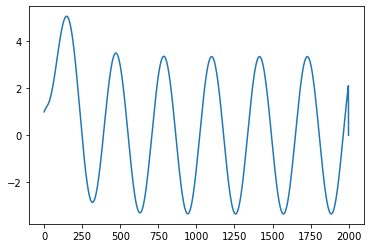

In [3]:
import numpy as np
import scipy.signal as sig
import scipy.linalg as la
import matplotlib.pyplot as plt

#parameter
zeta = 1.5
omega = 1

# simulate the true system response
A = np.mat([[0, 1], [-omega**2, -2*zeta*omega]])
B = np.mat([[0], [omega**2]])
C = np.mat('1 0')

dt = 0.02
Ad = np.eye(2) + A*dt
Bd = B*dt
Cd = C

nx = 2
nu = 1
ny = 1

N = 2000
times = np.arange(N)

x = np.mat(np.zeros((nx,N)))
u = np.mat(np.zeros((ny,N)))
v = np.mat(np.zeros((ny,N)))
w = np.mat(np.zeros((nx,N)))
y = np.mat(np.zeros((ny,N)))

x[:,0] = np.mat('1;1')

for k in range(N-1):        
    u[:,k] = 10*np.sin(k*0.02)
    y[:,k] = Cd*x[:,k]
    x[:,k+1] = Ad@x[:,k] + Bd*u[:,k]
    
plt.plot(times, y.T) 

## start estimation

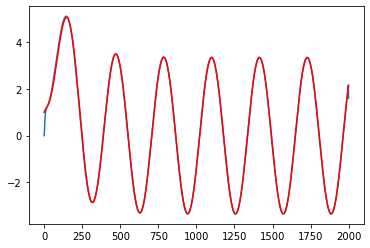

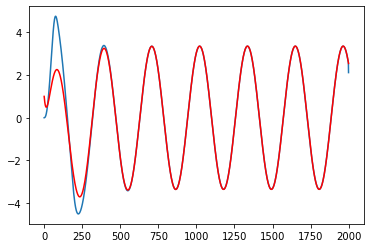

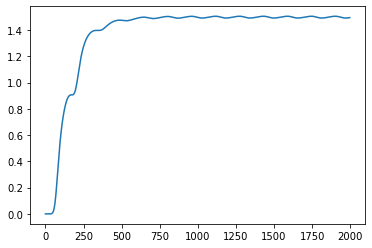

In [4]:
# Testing 

xhat = np.mat(np.zeros((nx+1,N)))  # xtilde_hat (x, zeta)
P= np.zeros((nx+1,nx+1,N))

measNoiseVar = 1
R = measNoiseVar * np.eye(ny)
Q = 0.1 * np.eye(nx+1)    
Q[2,2] = 0.01

for k in range(N-1):
    xhat[:,k]
    PCur = P[:,:,k]    
    # prediction step
    # compute linearized A matrix, which is F
    F = np.array([[1, dt, 0],[-dt, 1-2*xhat[2,k]*dt, -2*xhat[1,k]*dt], [0,0,1]])
    xhatPred = xhat[:,k] + np.array([[xhat[1,k]*dt], [-xhat[0,k]*dt-2*xhat[2,k]*xhat[1,k]*dt+u[0,k]*dt],[0]])
    PPred = F @ PCur @ F.T + Q
    # measurement update
    ymeas = y[:,k+1]
    H = np.mat('1,0,0')    
    hWithoutNoise = H@xhat[:,k]   
    Kgain = PPred @ H.T @ np.linalg.inv(H @ PPred @ H.T + R)
    xhatNext = xhatPred + Kgain @ (ymeas - hWithoutNoise)
    PNext = (np.identity(nx+1) - Kgain @ H) @ PPred

    # assign results
    xhat[:,k+1] = xhatNext
    P[:,:,k+1] = PNext

#plt.plot(times, xhat[2,:].T) 
plt.figure(1)
plt.plot(times, xhat[0,:].T) 
plt.plot(times, x[0,:].T, 'r') 
plt.figure(2)
plt.plot(times, xhat[1,:].T) 
plt.plot(times, x[1,:].T, 'r') 

plt.figure(3)
plt.plot(times[0:-2], xhat[2,0:-2].T) 